## <font color = blue>  Rania BOUADDI N115739

# Part 1: Install Necessary Packages

First, I should install the required Python packages using pip if they are not already installed.

In [1]:
!pip install tensorflow matplotlib seaborn scikit-learn


# Part 2: Import Libraries and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.datasets import cifar10

# Load CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Mapping class labels to their names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Matplotlib is building the font cache; this may take a moment.
2024-06-01 20:20:11.175073: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 104s 1us/step


- **Import Libraries:** I Imported all the necessary libraries for data manipulation, visualization, model building, and evaluation.

- **Load CIFAR10 Data:** This dataset consists of 60,000 32x32 color images in 10 different classes (6000 images per class).

- **Class Names:** Then I created a list of class names corresponding to the labels in the CIFAR10 dataset.


# Part 3: Create Binary Labels

In [2]:
def create_binary_labels(y):
    binary_labels = np.isin(y, [0, 2]).astype(np.int32)
    return binary_labels

y_train_binary = create_binary_labels(y_train)
y_test_binary = create_binary_labels(y_test)


I defined a function to create binary labels. The function checks if the label is either 0 (airplane) or 2 (bird) and assigns a 1 if true (can fly) and a 0 otherwise (cannot fly).


# Part 4: Normalize the Data

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Then I normalized the pixel values of the images to the range [0, 1] by dividing by 255. This helps in faster convergence during training.

# Part 5: Build the CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/Users/raniabouaddi/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


I Used **the Sequential API** from Keras to define a Convolutional Neural Network (CNN) with several layers:

   - **Conv2D Layers:** Convolutional layers with 32 and 64 filters, a 3x3 kernel size, and ReLU activation function.
   
   - **MaxPooling2D Layers:** Max-pooling layers to reduce the spatial dimensions of the feature maps.
   
   - **Flatten Layer:** Flattens the output from the convolutional layers to a 1D array.
   
   - **Dense Layers:** Fully connected layers, with the final layer having a single neuron and sigmoid activation for binary classification.
   
Then I compiled the model using the Adam optimizer, binary cross-entropy loss, and accuracy as a metric.

# Part 6: Train the Model

In [5]:
history = model.fit(x_train, y_train_binary, epochs=10, validation_data=(x_test, y_test_binary))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.8217 - loss: 0.4327 - val_accuracy: 0.8511 - val_loss: 0.3616
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8610 - loss: 0.3360 - val_accuracy: 0.8759 - val_loss: 0.3143
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8770 - loss: 0.3036 - val_accuracy: 0.8786 - val_loss: 0.3022
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.8902 - loss: 0.2738 - val_accuracy: 0.8771 - val_loss: 0.2979
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9018 - loss: 0.2443 - val_accuracy: 0.8826 - val_loss: 0.3212
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9096 - loss: 0.2238 - val_accuracy: 0.8718 - val_loss: 0.3101
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.9182 - loss: 0.2071 - val_accuracy: 0.8895 - val_loss: 0.2888
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.9260 -

I trained the model for **10 epochs** using the training data. Then I validated it on the test data after each epoch.


# Part 7: Evaluate the Model

In [6]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)
accuracy = accuracy_score(y_test_binary, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Precision: 0.7563451776649747
Recall: 0.6705
F1 Score: 0.7108401802279354
Accuracy: 0.8909


After training, I evaluated the model by predicting test image probabilities for the "can fly" category, converting these to binary using a 0.5 threshold. Then I calculate and print precision, recall, F1 score, and accuracy to assess performance.

# Part 8: Plot the Confusion Matrix

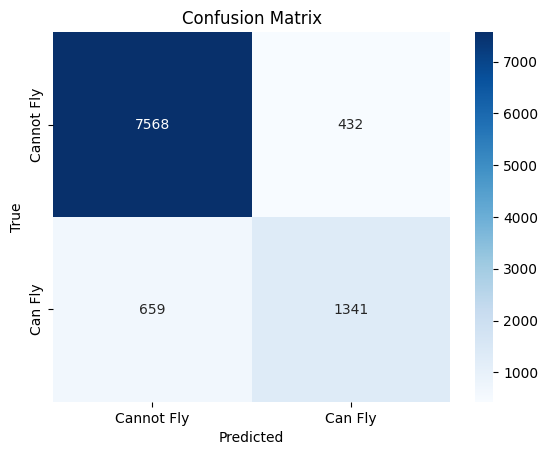

In [7]:
conf_matrix = confusion_matrix(y_test_binary, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Finally, to evaluate the classification model's performance, I calculated the confusion matrix. I then used Seaborn to plot this matrix for better visualization, labeling the axes and providing a title for clarity.